In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils

utils.font_setting()

## Catalog

In [7]:
import catalog

In [8]:
yale_catalog = catalog.YaleStarCatalog()
yale_catalog.info()

----- Yale Bright Star Catalog -----
the number of stars : 9096
the range of magnitude : [-1.46, 7.96]


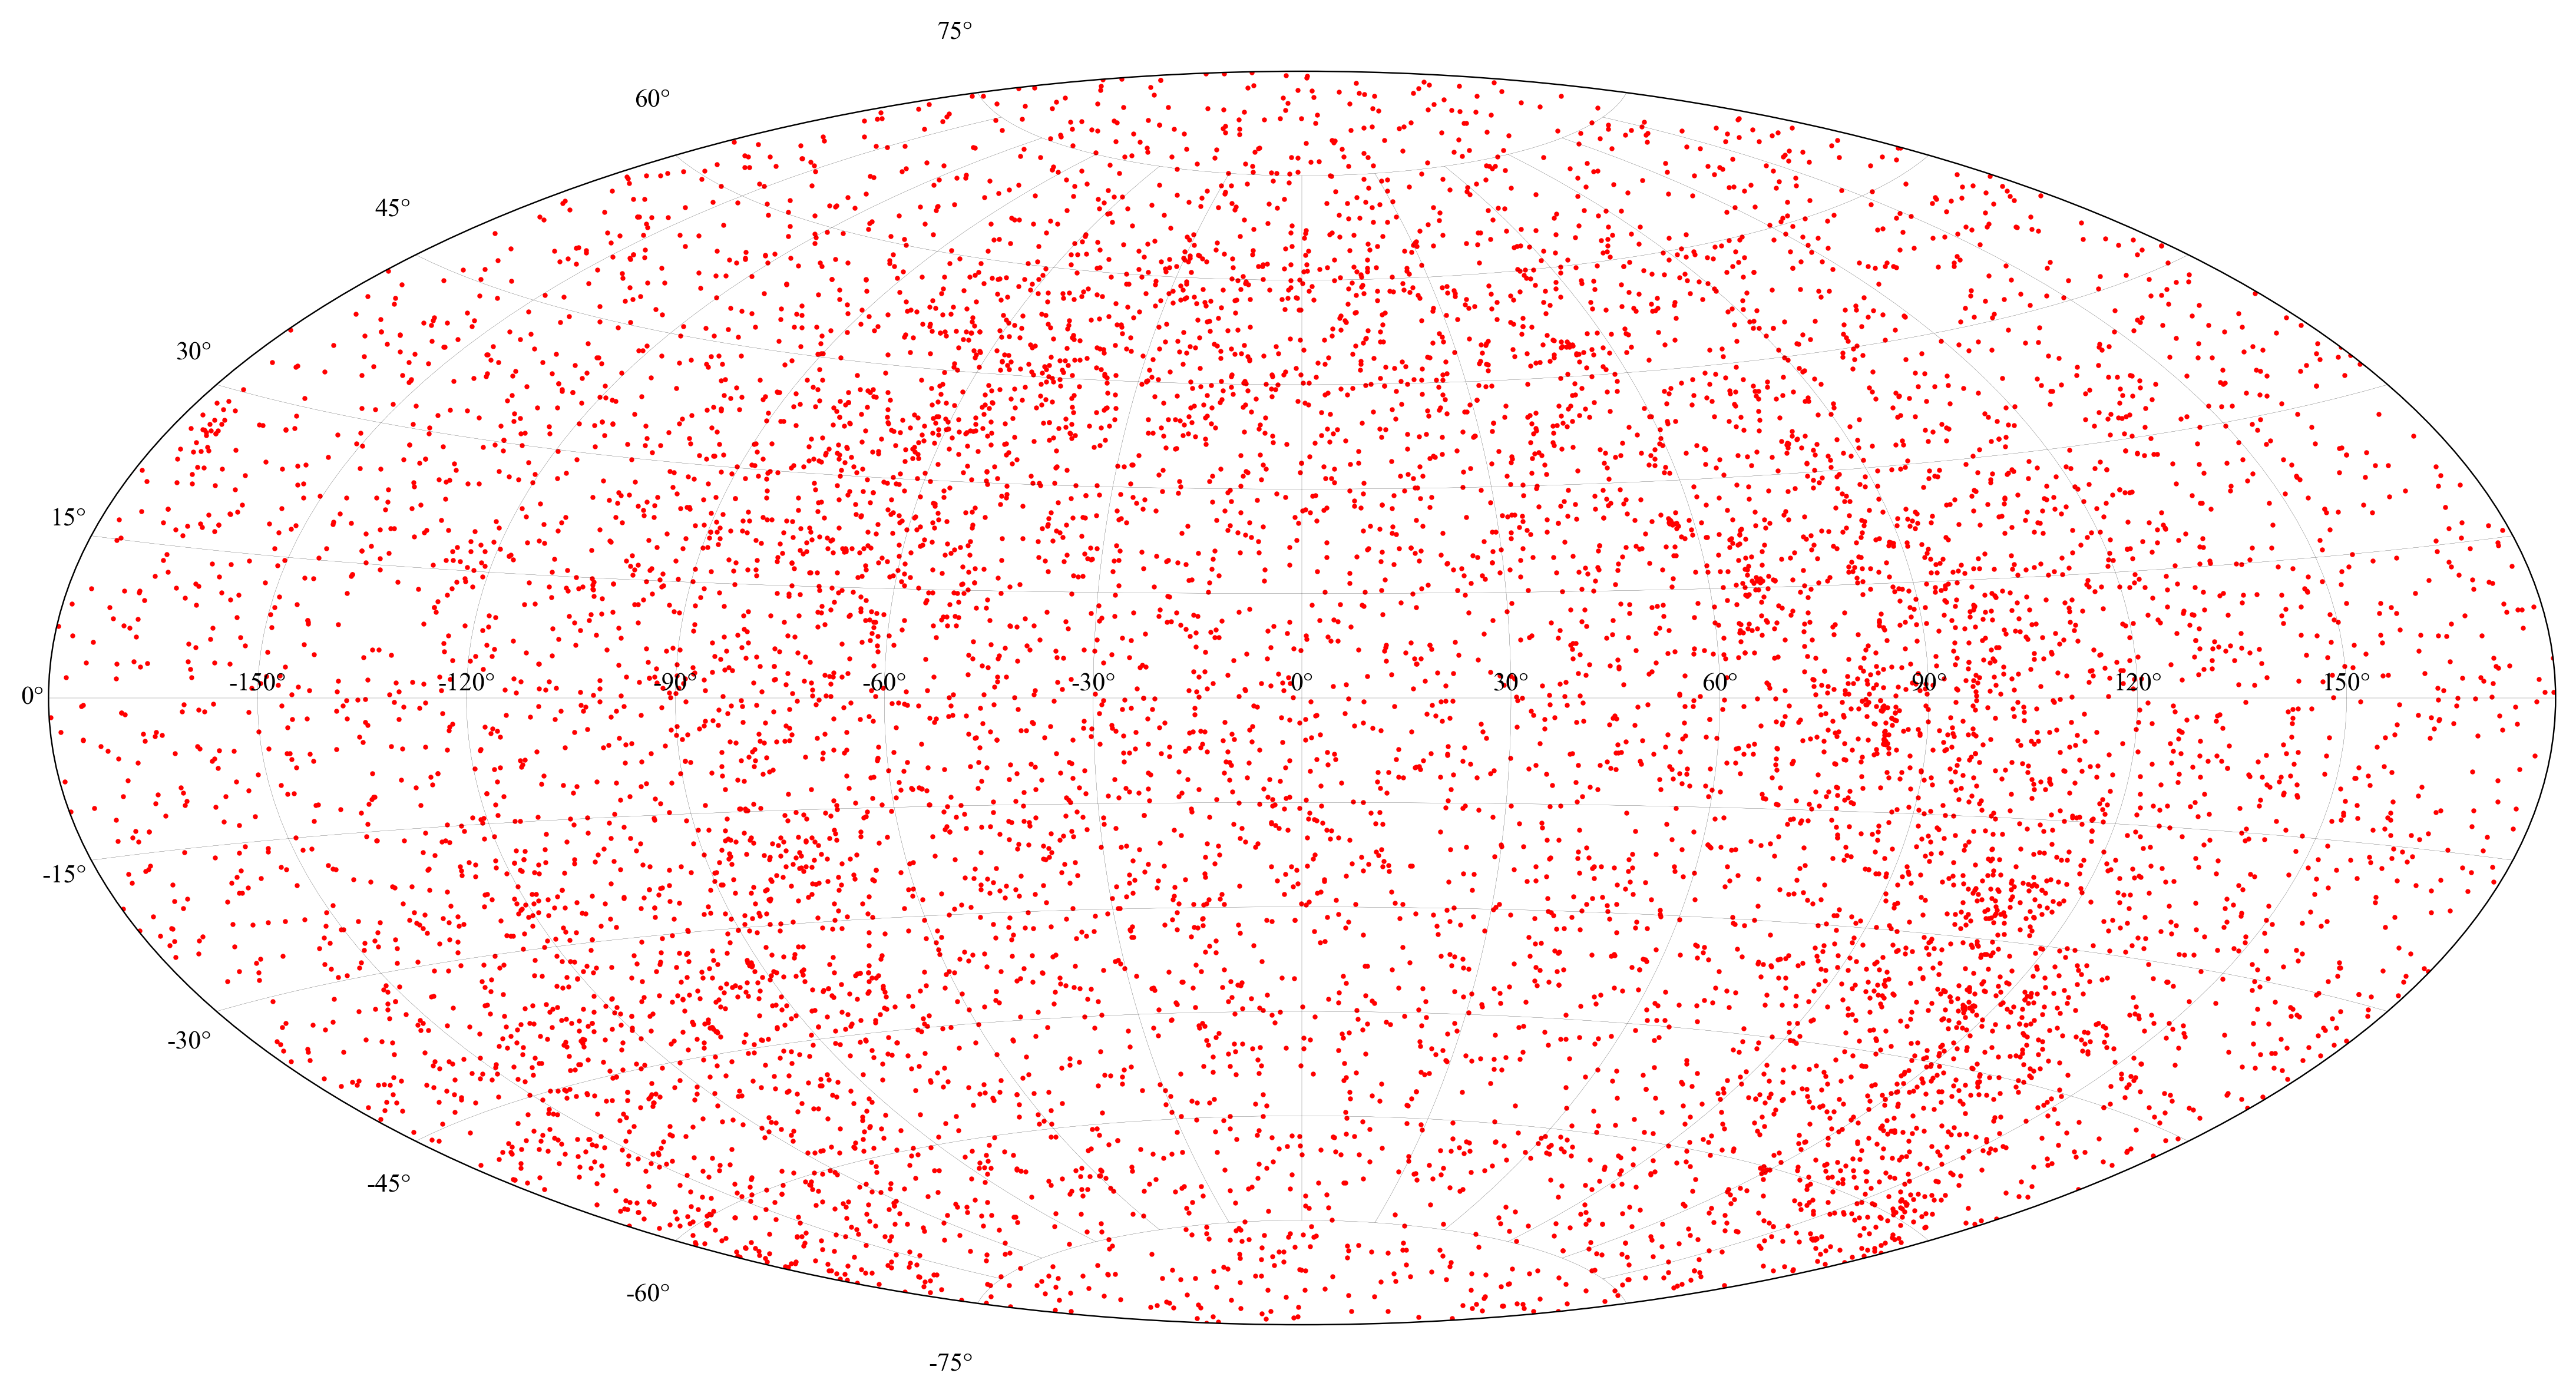

In [9]:
alpha = yale_catalog.get_RA()
delta = yale_catalog.get_DE()
# 
alpha_ = alpha.copy()
alpha_[alpha_ > np.pi] -= 2*np.pi

scale = 10
fig = plt.figure(figsize=(scale*1.6, scale))
ax = fig.add_subplot(1, 1, 1, projection="aitoff")

ax.scatter(
    alpha_, delta,
    s=3, linewidths=1.0e-10,
    marker='o', color='red'
)
plt.show()

## Star DB

In [10]:
import db

In [14]:
star_db = db.StarDB(
    yale_catalog.get_HR(), yale_catalog.get_RA(),
    yale_catalog.get_DE(), yale_catalog.get_Vmag(),
    Vmax=5.5)
star_db.info()

----- Star DB -----
the number of stars : 2847
the range of magnitude : [-1.46, 5.49]


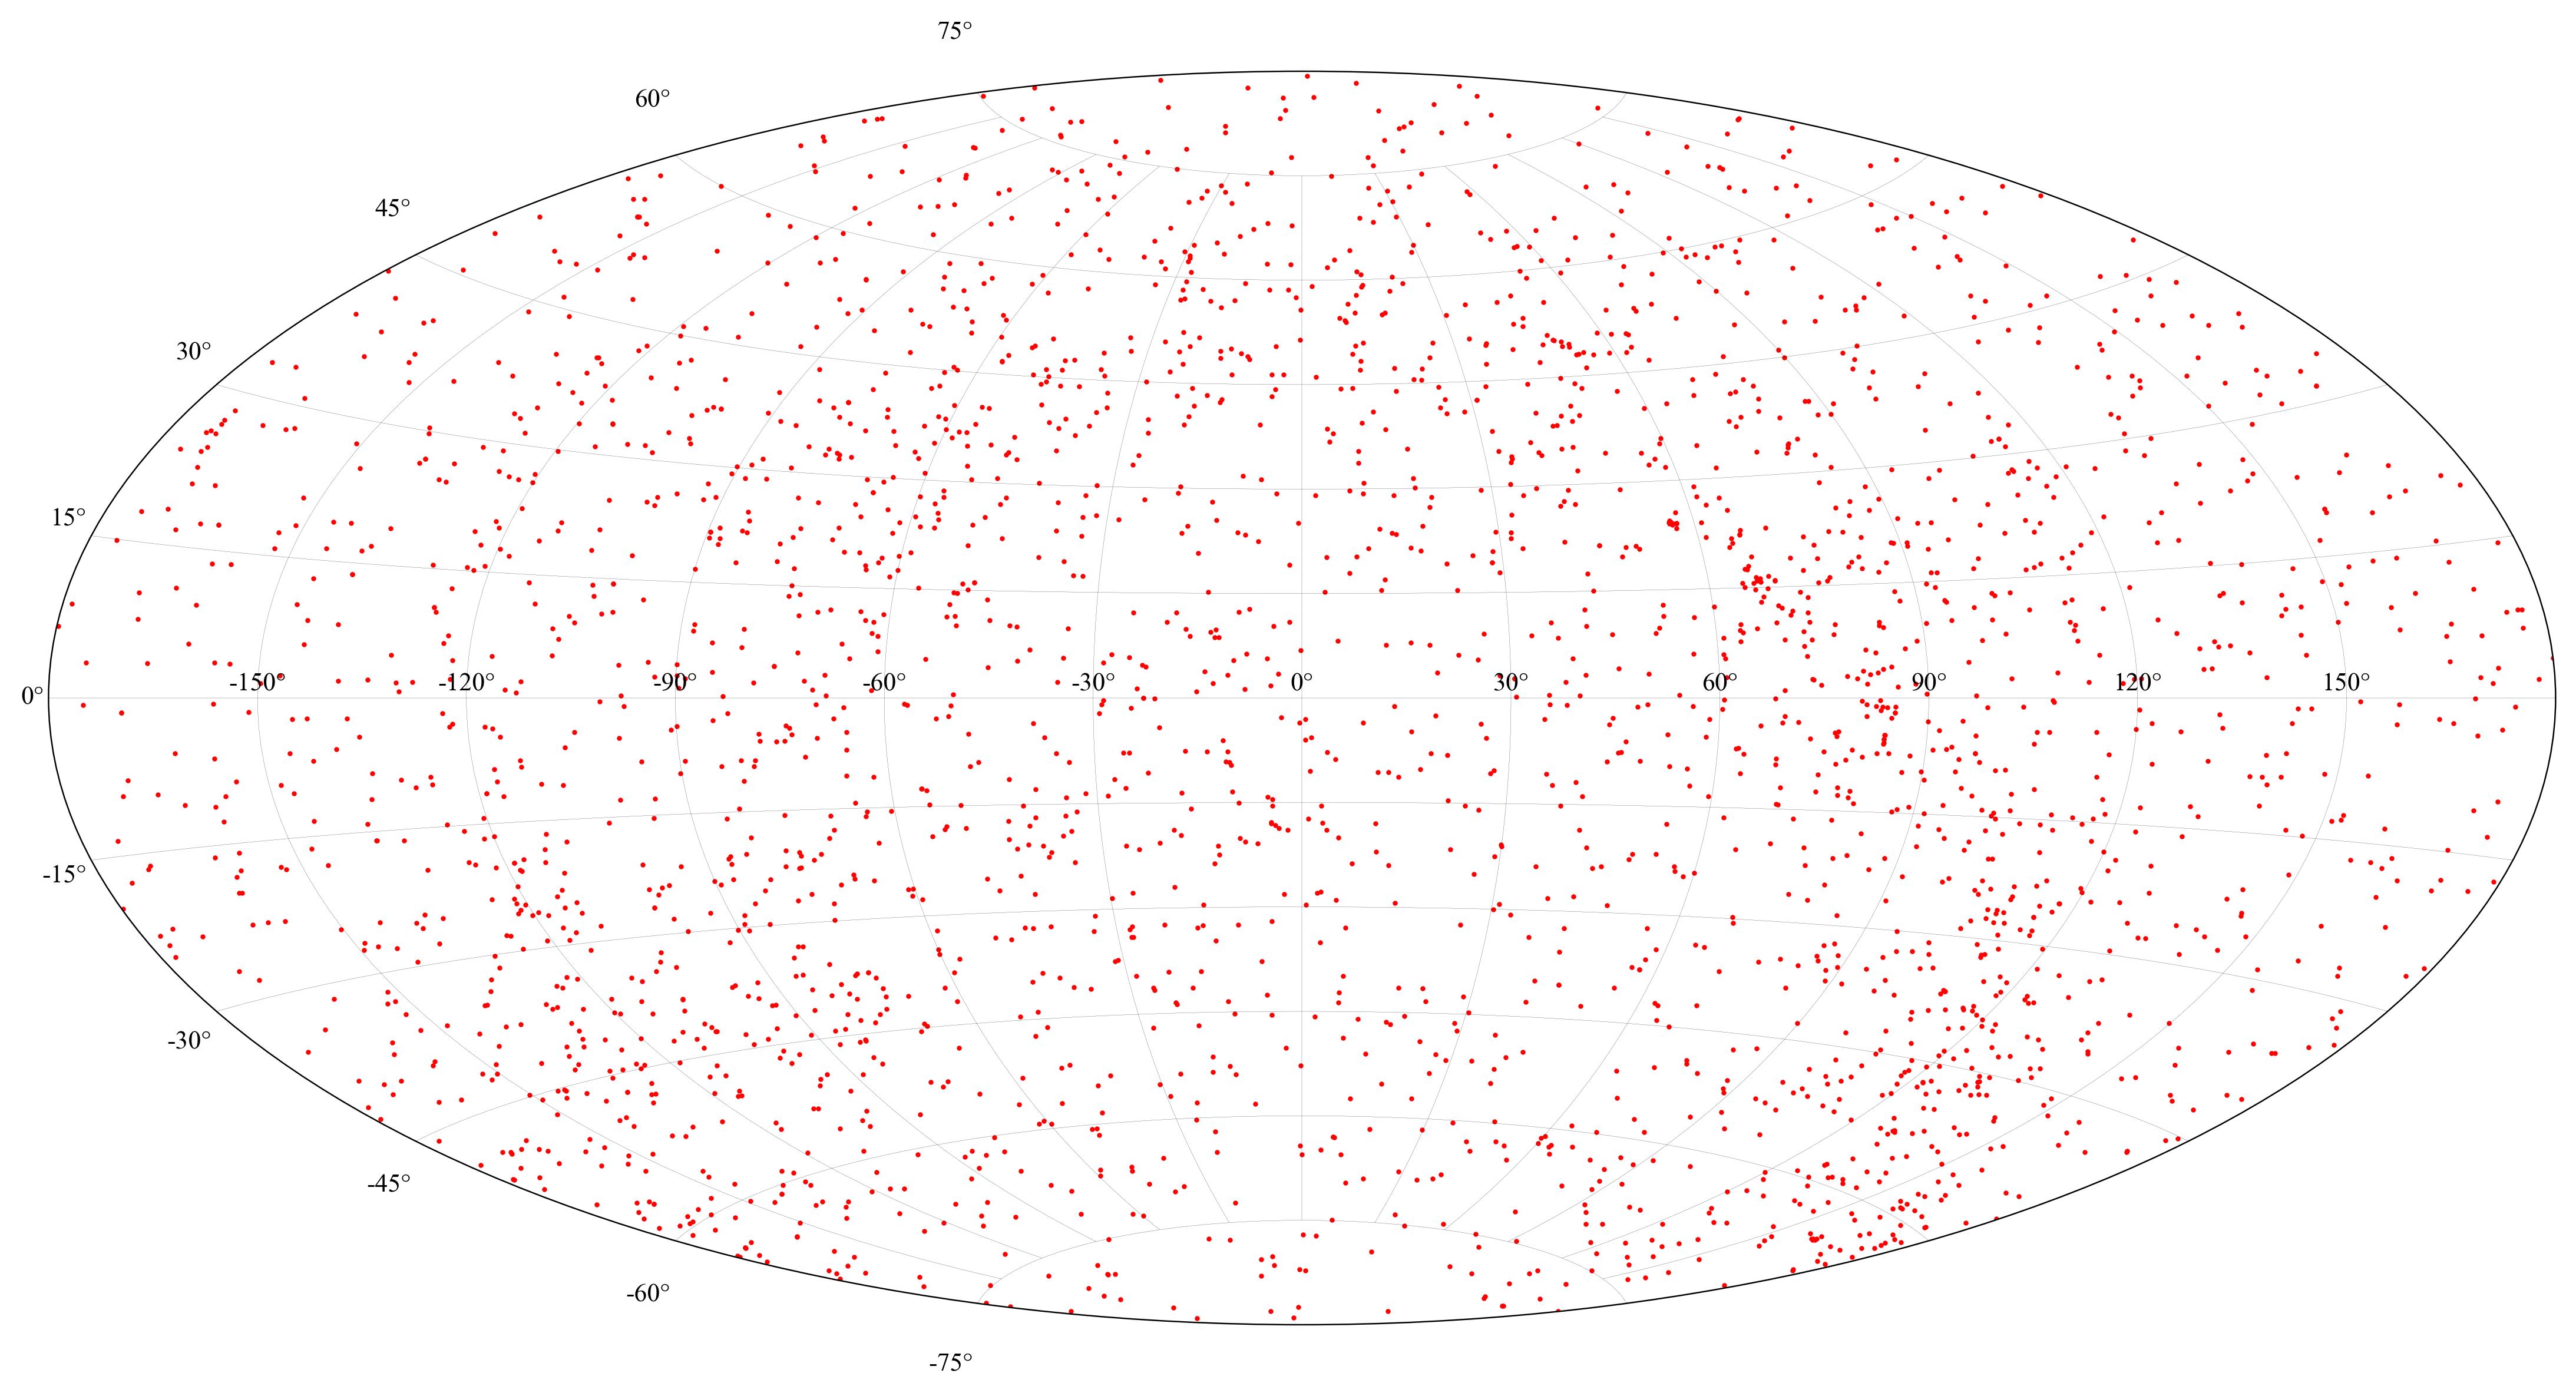

In [15]:
alpha = star_db.get_RA()
delta = star_db.get_DE()
# 
alpha_ = alpha.copy()
alpha_[alpha_ > np.pi] -= 2*np.pi

scale = 10
fig = plt.figure(figsize=(scale*1.6, scale))
ax = fig.add_subplot(1, 1, 1, projection="aitoff")

ax.scatter(
    alpha_, delta,
    s=3, linewidths=1.0e-10,
    marker='o', color='red'
)
plt.show()

In [17]:
pairstar_db = db.PairStarDB(
    star_db.get_I(), star_db.get_RA(),
    star_db.get_DE(), theta_FOV=30*np.pi/180)
pairstar_db.info()

----- Pair Star DB -----
the number of pairs : 1039723
the range of inter angle [deg.] : [0.0, 59.99999942611453]


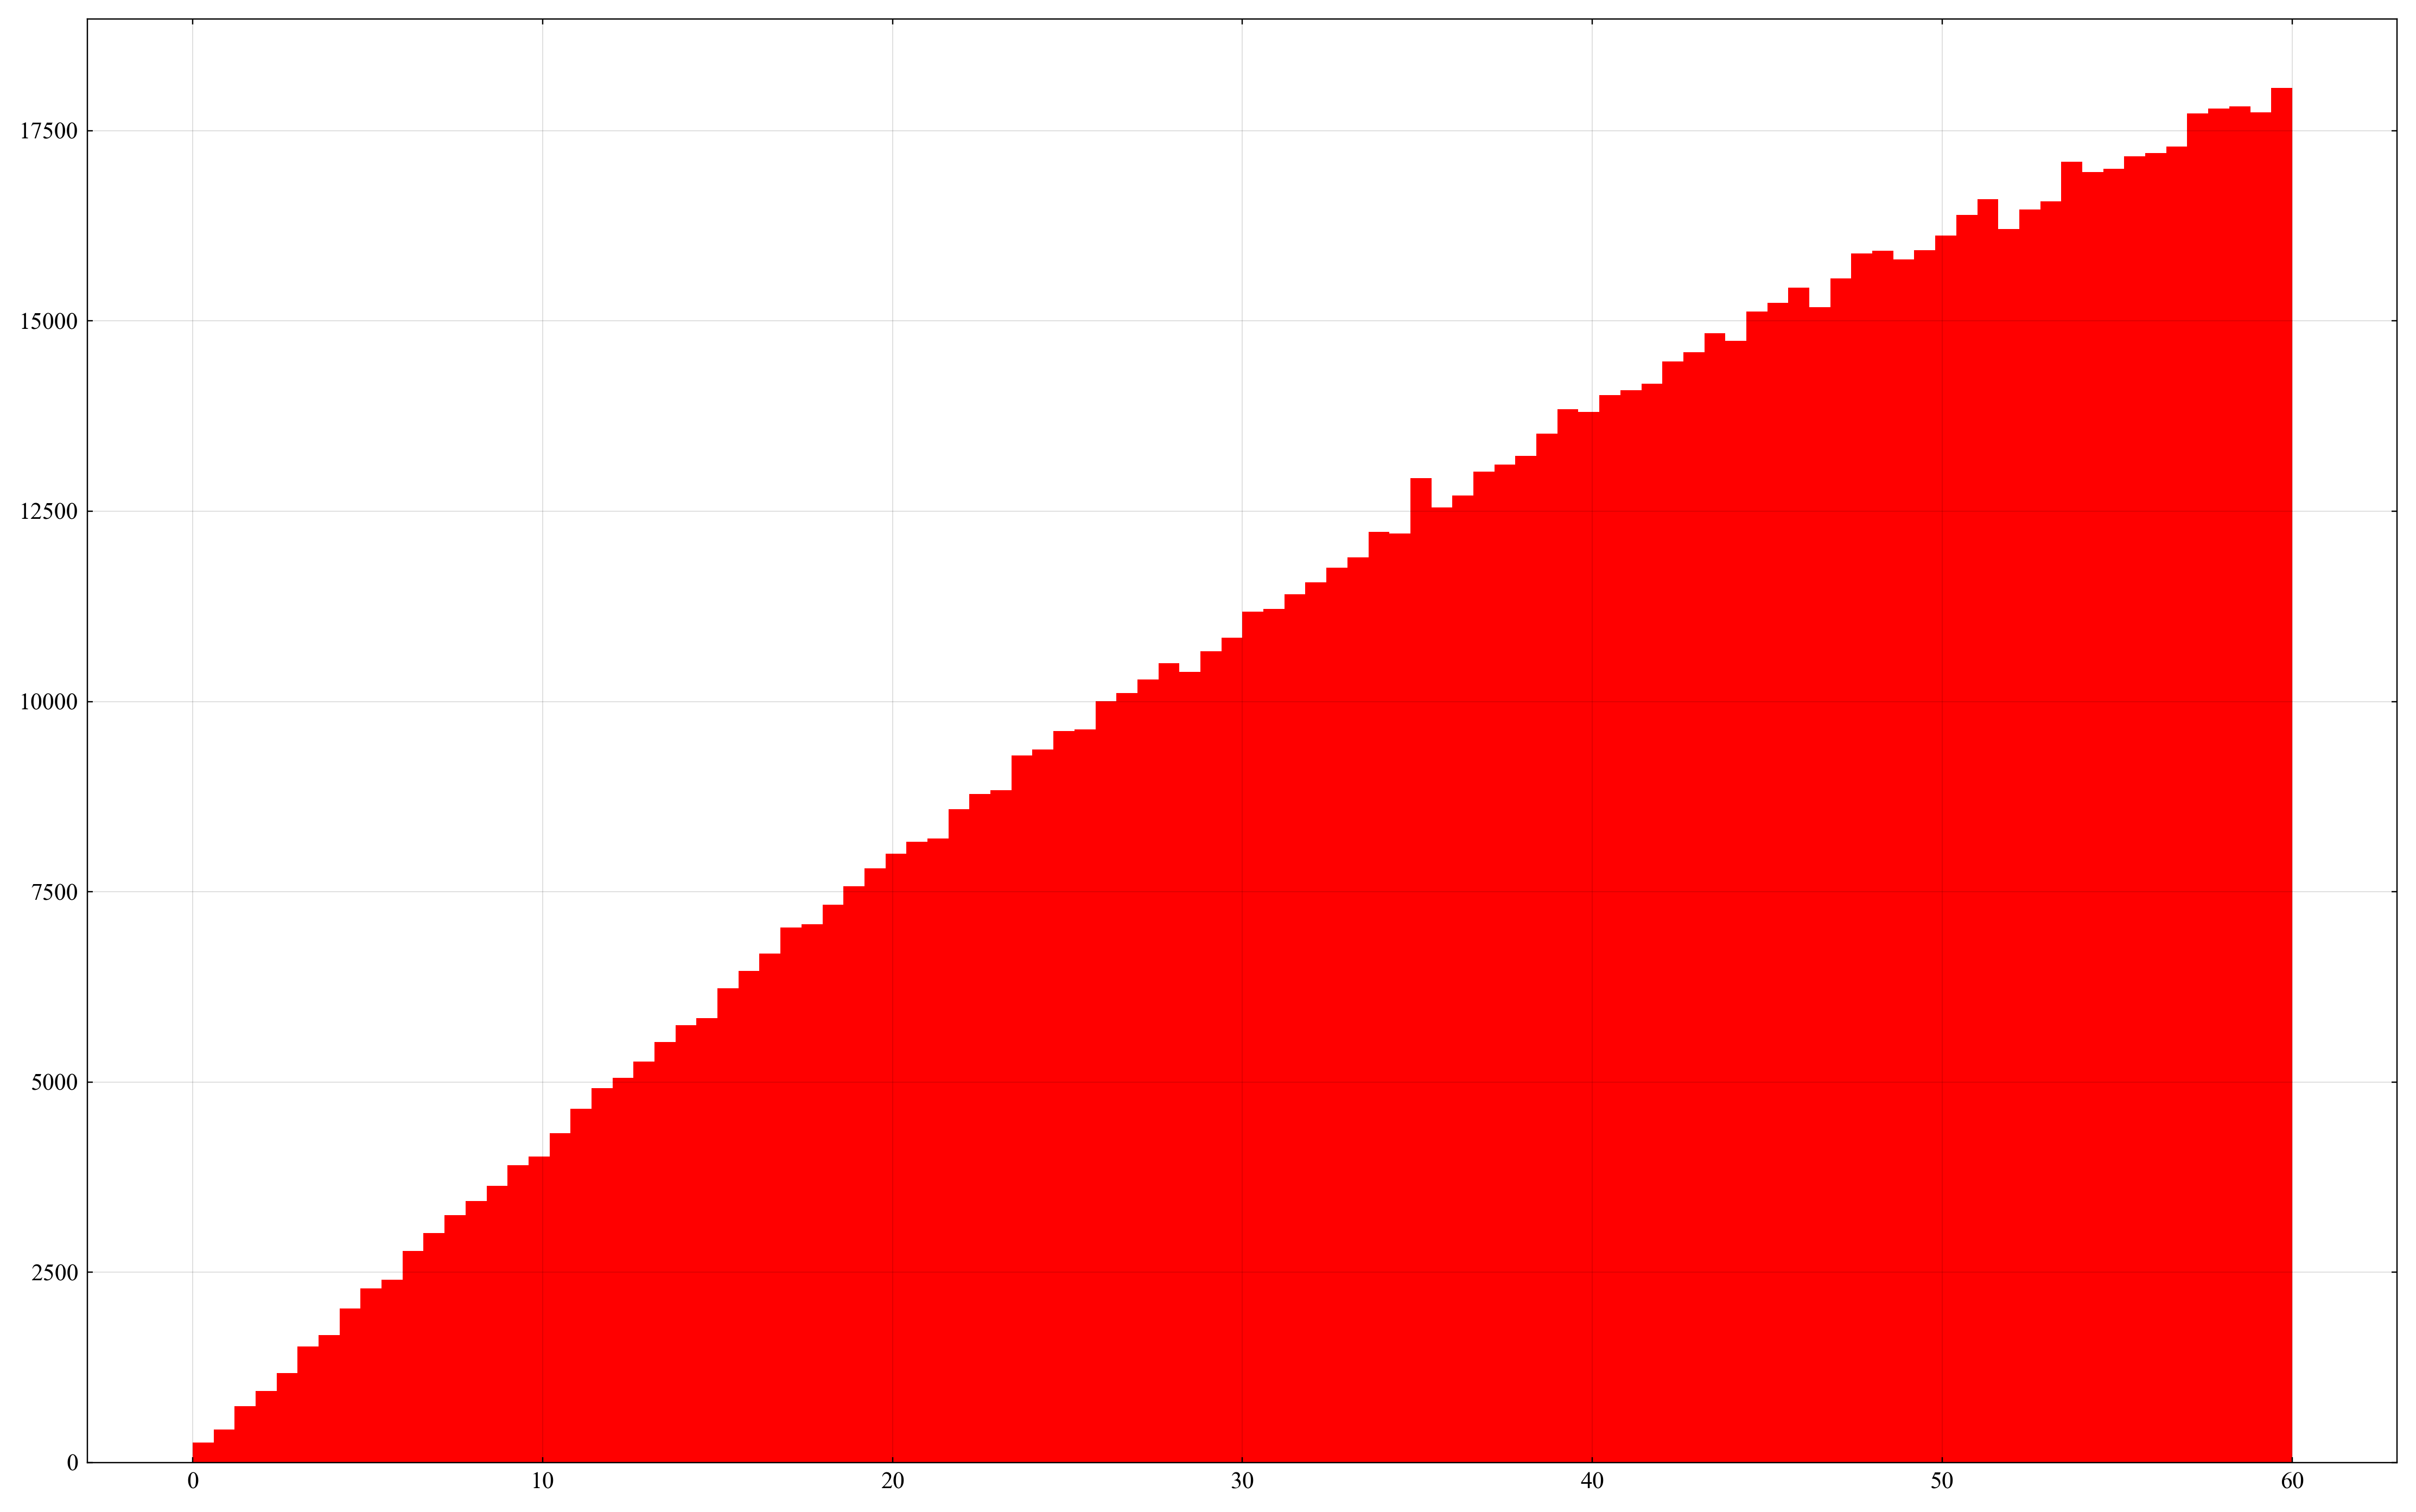

In [18]:
scale = 10
fig = plt.figure(figsize=(scale*1.6, scale))
ax = fig.add_subplot(1, 1, 1)

ax.hist(
    pairstar_db.get_Theta_pair_FOV()*180/np.pi,
    bins=100, color='red')
plt.show()

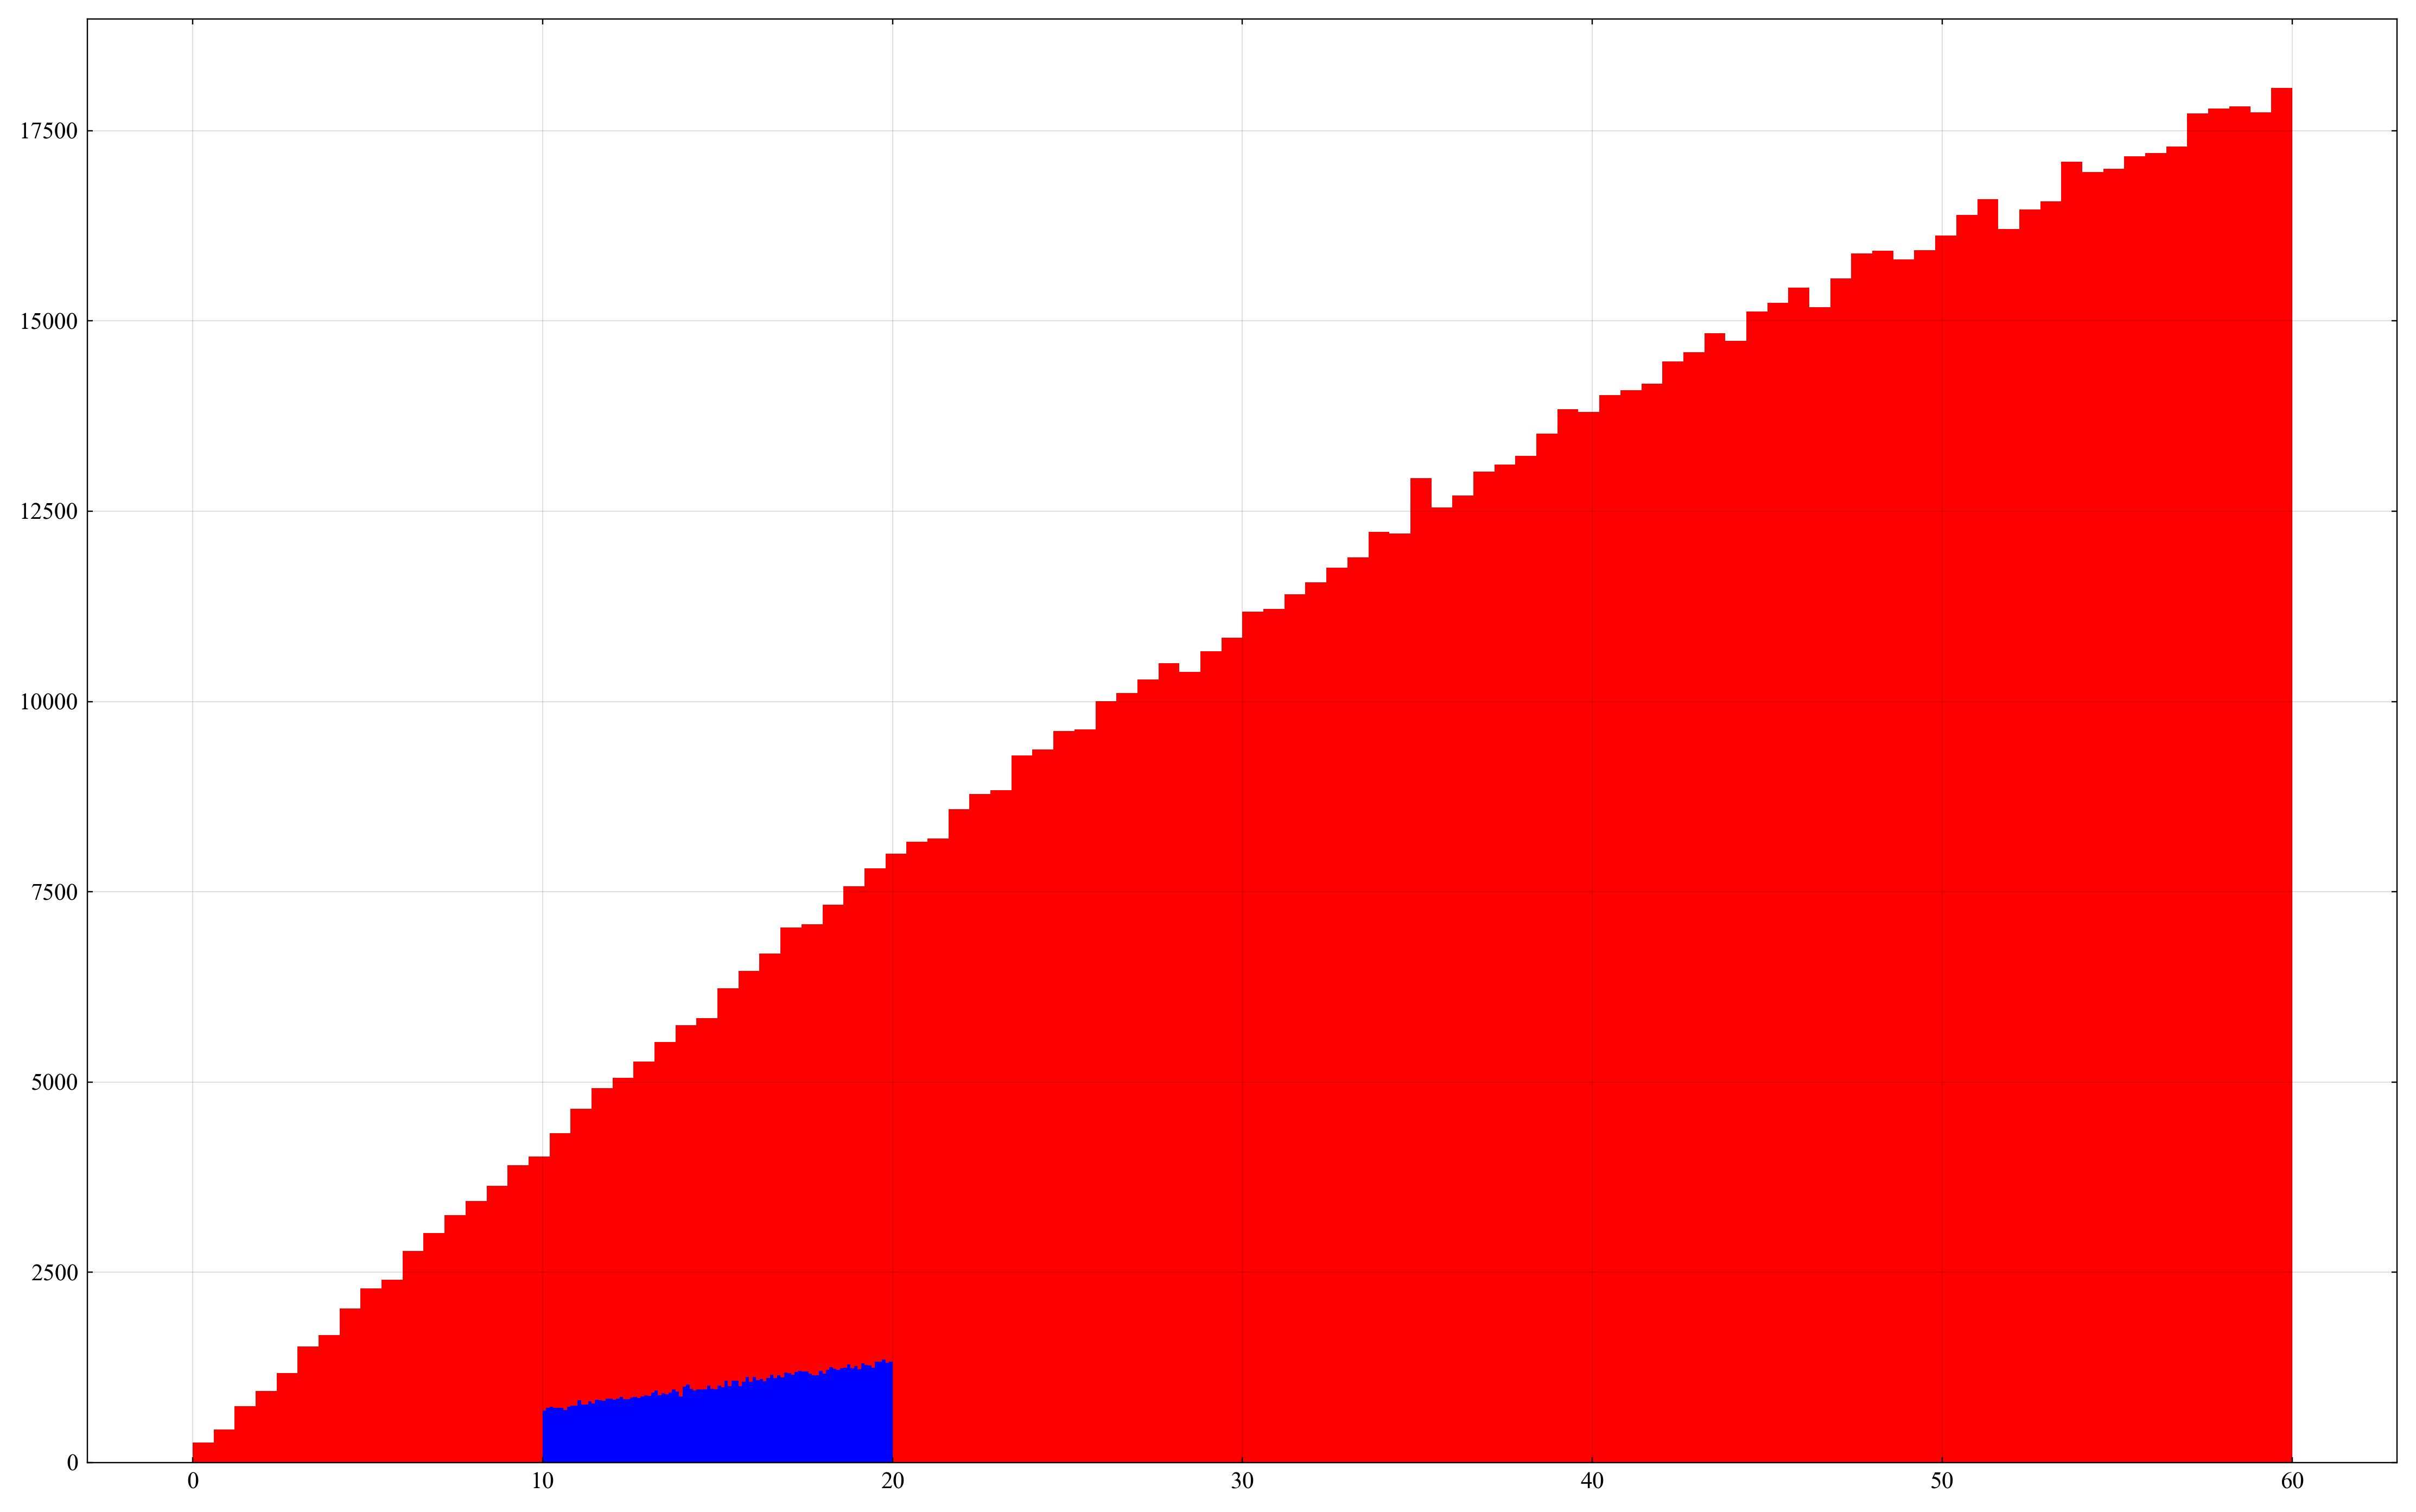

In [19]:
index = pairstar_db.get_index_in_certain_interval(10*np.pi/180, 20*np.pi/180)

scale = 10
fig = plt.figure(figsize=(scale*1.6, scale))
ax = fig.add_subplot(1, 1, 1)

ax.hist(
    pairstar_db.get_Theta_pair_FOV()*180/np.pi,
    bins=100, color='red')
ax.hist(
    pairstar_db.get_Theta_pair_FOV()[index]*180/np.pi,
    bins=100, color='blue')
plt.show()